In [29]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/DEPI/weather/weatherAUS.csv'
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values
# Example: Filling numerical columns with the mean and categorical columns with the mode
for col in df.columns:
    if df[col].dtype == 'object':  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # For numerical columns
        df[col].fillna(df[col].mean(), inplace=True)

# Verify that there are no missing values left
print("\nMissing Values After Filling:")
print(df.isnull().sum())



Missing Values:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Missing Values After Filling:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm

In [31]:
# Check for duplicates
print("\nNumber of Duplicate Rows:")
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

# Drop duplicates
df = df.drop_duplicates()

# Verify that duplicates are dropped
print("\nNumber of Duplicate Rows After Dropping:")
print(df.duplicated().sum())



Number of Duplicate Rows:
0

Number of Duplicate Rows After Dropping:
0


In [32]:
# Save the cleaned dataset (optional)
df.to_csv('cleaned_dataset.csv', index=False)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.469824  7.624853   
1  2008-12-02   Albury      7.4     25.1       0.0     5.469824  7.624853   
2  2008-12-03   Albury     12.9     25.7       0.0     5.469824  7.624853   
3  2008-12-04   Albury      9.2     28.0       0.0     5.469824  7.624853   
4  2008-12-05   Albury     17.5     32.3       1.0     5.469824  7.624853   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0 

Class Distribution Before Balancing:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


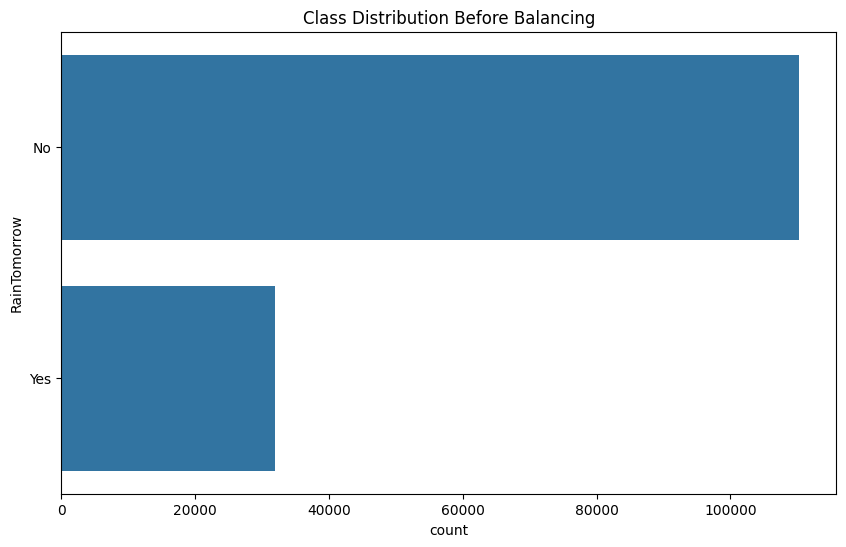

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable
target = 'RainTomorrow'  # Replace with your actual target column

# Check the distribution of the target variable
print("Class Distribution Before Balancing:")
print(df[target].value_counts())

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df[target], order=df[target].value_counts().index)
plt.title("Class Distribution Before Balancing")
plt.show()


Class Distribution After Undersampling:
RainTomorrow
No     31877
Yes    31877
Name: count, dtype: int64


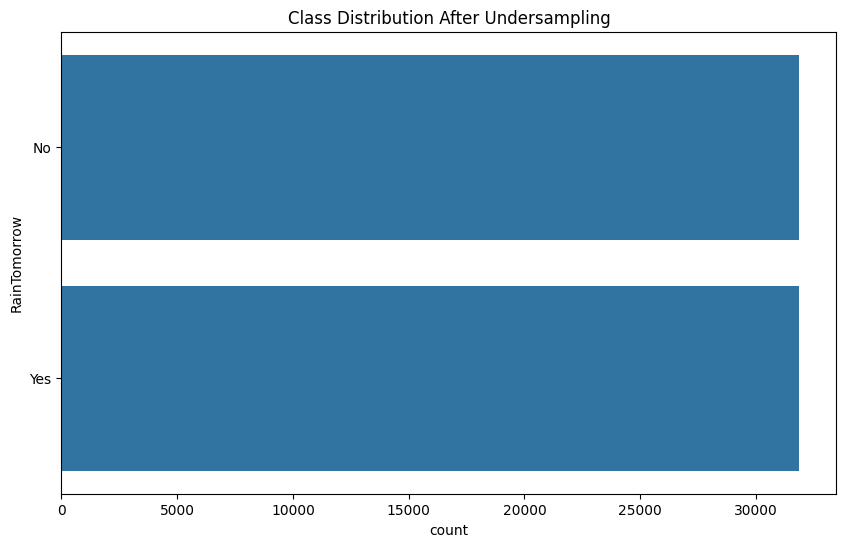

In [34]:
from imblearn.under_sampling import RandomUnderSampler

# Features and target
X = df.drop(columns=[target])
y = df[target]

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Combine back into a DataFrame
df = pd.concat([X_res, y_res], axis=1)

# Check the new class distribution
print("Class Distribution After Undersampling:")
print(df[target].value_counts())

# Visualize the new class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df[target], order=df[target].value_counts().index)
plt.title("Class Distribution After Undersampling")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


# Features and target
target = 'RainTomorrow'  # Replace with your target column
X = df.drop(columns=[target])
y = df[target]

# Convert categorical columns to numeric
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Check the data types
print("Data Types After Encoding:")
print(X.dtypes)

# Apply SMOTE (optional, if needed for balancing)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Data Types After Encoding:
Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
dtype: object
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.82      0.80      9529
         Yes       0.81      0.77      0.79      9598

    accuracy                           0.79     19127
   macro avg       0.79      0.79      0.79     19127
weighted avg       0.79      0.79      0.79     19127



In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid Search for best k and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

# Evaluate using cross-validation
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                metric=grid_search.best_params_['metric'])
cross_val_scores = cross_val_score(knn_best, X_train_scaled, y_train, cv=5)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

# Train and evaluate the best model
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 332, in predict_proba
    probabilities = ArgKminClassMode.co

Best parameters found:
{'metric': 'euclidean', 'n_neighbors': 19}
Cross-Validation Scores: [0.79834192 0.81088954 0.80560224 0.80067227 0.8087395 ]
Mean CV Score: 0.804849092852467
Classification Report:
              precision    recall  f1-score   support

          No       0.79      0.84      0.81      9529
         Yes       0.83      0.77      0.80      9598

    accuracy                           0.81     19127
   macro avg       0.81      0.81      0.81     19127
weighted avg       0.81      0.81      0.81     19127

